# CCM Final Project
#### Baysian Modeling of Orientation WM prior

### Content
1. Load and Sort data
2. Prior Model Simulate
3. Fit Prior Model
4. Validation of Prior Model (Recover the params from the simulated data)

### 1. Load and Sort Data

In [118]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import minimize
from scipy.special import logsumexp

In [3]:
curr_dif = os.getcwd()
data_dir = os.path.abspath(os.path.join(curr_dif, '..\\..\\'))
os.listdir(data_dir)

['.Rhistory',
 '.Rproj.user',
 'CCM_finalProject',
 'CCM_Final_23Spring.Rproj',
 'data',
 'data_beh.csv',
 'figures',
 'scripts']

In [4]:
data_path = os.path.join(data_dir,'data_beh.csv')
data = pd.read_csv(data_path,sep=',')

data.head()

,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
1,1,1,2,3,1,-9,171,85,165,6,88,3.047162,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
3,1,1,4,1,3,6,96,12,99,-3,94,3.697208,NaN,0.2
4,1,1,5,3,4,3,138,43,143,-5,90,3.665645,NaN,0.2


In [7]:
data_df = pd.DataFrame(data)
flag = data_df['outoftime']!=1
print(sum(flag))
data_clean = data_df[flag]
data_clean['oriRef2'] = (data_clean['oriRef']-1) * 45
data_clean['oriFinal2'] = data_clean['oriRef2'] + data_clean['oriJitt']
data_clean['oriRespFinal2'] = data_clean['oriFinal2'] - data_clean['error']
data_clean['oriFinal3'] = data_clean['oriJitt']
data_clean['oriRespFinal3'] = data_clean['oriRespFinal2'] - data_clean['oriRef2']
data_clean = data_clean[data_clean['error'].abs() < 22.55]
data_clean

2319


C:\Users\kay\AppData\Local\Temp\ipykernel_18492\3190871318.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['oriRef2'] = (data_clean['oriRef']-1) * 45
C:\Users\kay\AppData\Local\Temp\ipykernel_18492\3190871318.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['oriFinal2'] = data_clean['oriRef2'] + data_clean['oriJitt']
C:\Users\kay\AppData\Local\Temp\ipykernel_18492\3190871318.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try usi

,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti,oriRef2,oriFinal2,oriRespFinal2,oriFinal3,oriRespFinal3
1,1,1,2,3,1,-9,171,85,165,6,88,3.047162,NaN,0.2,0,-9,-15,-9,-15
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2,45,44,53,-1,8
3,1,1,4,1,3,6,96,12,99,-3,94,3.697208,NaN,0.2,90,96,99,6,9
4,1,1,5,3,4,3,138,43,143,-5,90,3.665645,NaN,0.2,135,138,143,3,8
5,1,1,6,7,1,-9,171,152,164,7,86,1.547777,NaN,0.2,0,-9,-16,-9,-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2394,15,1,155,7,3,-1,89,93,88,1,98,2.375790,NaN,0.2,90,89,88,-1,-2
2395,15,1,156,1,3,0,90,18,91,-1,98,2.757365,NaN,0.2,90,90,91,0,1
2397,15,1,158,5,4,1,136,149,127,9,82,2.387765,NaN,0.2,135,136,127,1,-8
2398,15,1,159,2,2,-6,39,20,46,-7,86,1.181797,NaN,0.2,45,39,46,-6,1


In [17]:
data_ref1 = data_clean[data_clean['oriRef']==1 ]
data_ref2 = data_clean[data_clean['oriRef']==2 ]
data_ref3 = data_clean[data_clean['oriRef']==3 ]
data_ref4 = data_clean[data_clean['oriRef']==4 ]

#flip_flag = data_ref1['oriFinal'>=170]
#data_ref1['oriFinal'] = data_ref1[flip_flag,['oriFinal']]-180

In [18]:
data_ref2

,subjID,run,trial,phase,oriRef,oriJitt,oriFinal,oriRespInit,oriRespFinal,error,points,rt,outoftime,iti
0,1,1,1,9,2,-9,36,63,62,-26,48,2.609021,NaN,0.2
2,1,1,3,4,2,-1,44,58,53,-9,82,2.500657,NaN,0.2
8,1,1,9,1,2,8,53,112,57,-4,92,3.648202,NaN,0.2
10,1,1,11,9,2,7,52,80,69,-17,66,1.732261,NaN,0.2
11,1,1,12,2,2,-6,39,112,36,3,94,3.745060,NaN,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,15,1,135,8,2,8,53,18,57,-4,92,1.345367,NaN,0.2
2379,15,1,140,4,2,1,46,176,48,-2,96,1.399973,NaN,0.2
2380,15,1,141,2,2,3,48,87,48,0,100,1.466586,NaN,0.2
2385,15,1,146,6,2,-6,39,147,29,10,80,1.799879,NaN,0.2


### Prior Model Simulate

In [348]:
data_subj=data_ref2[data_ref2['subjID']==1]

targ_loc = np.array(subject_data['oriFinal'])
real_response = np.array(subject_data['oriRespFinal'])

In [355]:
def prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std):
    posterior = [];
    answers = [];
    xs = np.linspace(-90, 90, 361)
    for i in range(targ_loc.shape[0]):
        representation = norm.pdf(xs, loc=targ_loc[i], scale=likelihood_std)
        prior = norm.pdf(xs, loc=prior_mu, scale=prior_std)
        post = representation * prior
        post = post/sum(post) # normalize
        
        random_answer = np.random.choice(xs,p = post)
        answers.append(random_answer)
        posterior.append(post[round(random_answer)])
        #errors = answers-targ_loc
    return answers,posterior

In [356]:
# let's try to simulate a fake subj when refence is 2

prior_mu = 45
prior_std = 25

likelihood_std = 15

answers,posterior = prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std)
print(answers)

[43.0, 43.5, 52.0, 60.0, 36.5, 54.5, 61.5, 50.5, 65.5, 30.5, 53.5, 15.0, 72.0, 46.0, 58.0, 82.5, 79.0, 51.5, 38.5, 39.0, 53.0, 52.5, 49.0, 73.5, 46.5, 41.0, 47.0, 48.5, 59.5, 55.0, 35.0, 37.5, 23.0, 50.5, 57.0, 40.0, 50.0, 16.0, 37.5]


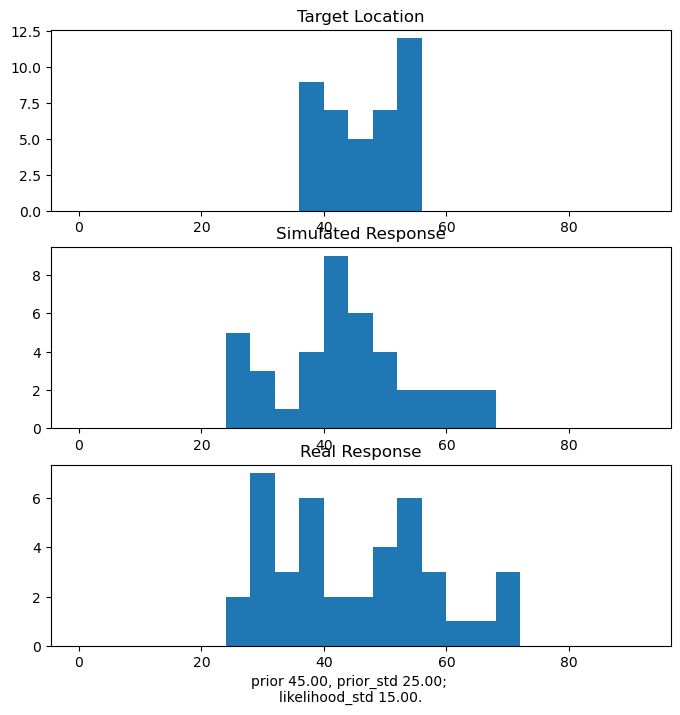

In [352]:
# Plot the target location histogram

# Define the bin sizes
bin_targ = 4

# Create the figure and subplots
fig, axs = plt.subplots(3, 1, figsize=(8, 8))

# Plot the target location histogram
axs[0].hist(targ_loc, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[0].set_title('Target Location')

# Plot the response location histogram
axs[1].hist(answers, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[1].set_title('Simulated Response')

# Plot the response error histogram
axs[2].hist(real_response, bins=np.arange(0, 90 + bin_targ, bin_targ))
axs[2].set_title('Real Response')
# Set the x-label with the parameters
xtxt = f"prior {prior_mu:.2f}, prior_std {prior_std:.2f}; \nlikelihood_std {likelihood_std:.2f}."
fig.text(0.5, 0.04, xtxt, ha='center')

# Show the plot
plt.show()

### 3.Fit Prior Model

In [26]:
data_ref2 = data_clean[data_clean['oriRef2'] == 45 ]
subject_data = data_ref2[data_ref2['subjID']==1]
targ_loc = np.array(subject_data['oriFinal3'])
real_response = np.array(subject_data['oriRespFinal3'])
subject_data
targ_loc = np.array(subject_data['oriFinal3'])
true_answer = np.array(subject_data['oriRespFinal3'])

In [34]:
# Qingqing
def prior_cal_nll(targ_loc,true_answer, params):
    ntrials = targ_loc.shape[0]
    
    xs = np.arange(-45, 135, 0.01)
    prior_mu = params[0]
    prior_std = params[1]
    likelihood_std = params[2]
    
    # can create prior outside of the loop because doesn't change
    prior = norm.pdf(xs, loc=prior_mu, scale=prior_std)
    
    prior = np.tile(prior[:, np.newaxis], (1, int(ntrials)))

    # representation is also easy to do without a loop
    representation = norm.pdf(xs.reshape(-1,1), loc=targ_loc, scale=likelihood_std)

    post = representation * prior
    # check with QQ
    # post = post/np.sum(post, axis=1, keepdims=True)
    post = post/np.sum(post, axis=1, keepdims=True)

    # this is the true answer
    xs_matrix = np.tile(xs, (ntrials,1))
    
    #true_answer = true_answer.values
    
    index = np.argmin(np.abs(xs_matrix - true_answer.reshape(-1,1)), axis=1) #find the closest one
    
    if len(index) != len(true_answer):
        raise ValueError('the num of llh is not the number of trial')

    col_post = post.flatten(order='F')
    col_probs = col_post[index]
    llh = np.sum(np.log(col_probs))
    nLL = -llh 

    return nLL

In [ ]:
# Kay

In [79]:
# Kay
def prior_nll(targ_loc,true_answer, prior_std, likelihood_std):
    ntrials = targ_loc.shape[0]
    
    xs = np.linspace(-90, 90, 181)
    prior_mu = 0
    
    log_prior = norm.logpdf(xs, loc=prior_mu, scale=prior_std)
    log_prior = np.tile(log_prior, (ntrials, 1))

    log_likelihood = norm.logpdf(xs.reshape(1, -1), loc=targ_loc[:, np.newaxis], scale=likelihood_std)

    log_post_unnormalized = log_likelihood + log_prior
    normalizing_factor = logsumexp(log_post_unnormalized)
    log_post = log_post_unnormalized - normalizing_factor

    nll = -log_post

    nLL = []
    for i in range(0,len(true_answer)):
        trial_true = (true_answer[i] + 90).astype(int)
        trail_nll = nll[i]
        trail_nLL = trail_nll[trial_true]
        nLL.append(trail_nLL)
    return np.sum(np.array(nLL))

In [80]:
def wrapped_prior_nll(params, targ_loc, true_answer):
    prior_std, likelihood_std = params
    return prior_nll(targ_loc,true_answer, prior_std, likelihood_std)

# Set initial guesses for prior_std and likelihood_std
init_guess_prior = [10, 10]  # [prior_std_guess, likelihood_std_guess]

In [107]:
def generate_synthetic_data_prior(n_samples, prior_mu, prior_std, likelihood_std):
    real_response = []
    # Generate target locations (targ_loc) from the prior
    targ_loc = np.random.normal(prior_mu, prior_std, n_samples)
    targ_loc = np.round(targ_loc)
    targ_loc = np.clip(targ_loc, -90, 90)
    # Generate real_response values by adding noise to the targ_loc values
    for i in targ_loc:
        real_response.append(np.clip(i + np.round(np.random.normal(0, likelihood_std)), -90, 90))
    return targ_loc, np.array(real_response)

n_samples = 1000
prior_mu = 0

prior_std = 10
likelihood_std = 10

targ_loc, true_answer = generate_synthetic_data_prior(n_samples, prior_mu, prior_std, likelihood_std)

In [108]:
result_prior_synthetic = minimize(wrapped_prior_nll, init_guess_prior, 
                                  args=(targ_loc, true_answer), bounds=((1e-5, 100), (1e-5, 100)))
recovered_prior_std, recovered_likelihood_std = result_prior_synthetic.x

print("True prior_std:", prior_std)
print("Recovered prior_std:", recovered_prior_std)
print("True likelihood_std:", likelihood_std)
print("Recovered likelihood_std (with prior):", recovered_likelihood_std)

True prior_std: 10
Recovered prior_std: 100.0
True likelihood_std: 10
Recovered likelihood_std (with prior): 9.770246934104712


In [121]:
n_samples = 5000
prior_mu = 0

prior_std = []
likelihood_std = []

recovered_prior_std = []
recovered_likelihood_std = []
recovered_nll = []
initial_nll = []

for i in range(0, 1000):
    i_prior_std = np.random.randint(1, 20, 1)
    prior_std.append(i_prior_std)
    i_likelihood_std = np.random.randint(1, 20, 1)
    likelihood_std.append(i_likelihood_std)
    targ_loc, true_answer = generate_synthetic_data_prior(n_samples, prior_mu, i_prior_std, i_likelihood_std)
    init_guess_prior = [np.random.normal(20, 15), np.random.normal(20, 15)]
    result_prior_synthetic = minimize(wrapped_prior_nll, init_guess_prior, 
                                  args=(targ_loc, true_answer), bounds=((1e-5, 500), (1e-5, 500)))
    i_recovered_prior_std, i_recovered_likelihood_std = result_prior_synthetic.x
    recovered_prior_std.append(i_recovered_prior_std)
    recovered_likelihood_std.append(i_recovered_likelihood_std)
    recovered_nll.append(prior_nll(targ_loc,true_answer, i_recovered_prior_std, i_recovered_likelihood_std))
    initial_nll.append(prior_nll(targ_loc,true_answer, 10, 10))

In [124]:
output_dict = {
    'prior_std':prior_std,
    'recovered_prior_std': recovered_prior_std,
    'likelihood_std':likelihood_std,
    'recovered_likelihood_std': recovered_likelihood_std,
    'recovered_nll': recovered_nll,
    'initial_nll': initial_nll
}

simulation_df = pd.DataFrame(output_dict)
pd.set_option('display.max_rows', None)
simulation_df
#[simulation_df['recovered_nll'] >= simulation_df['initial_nll']]

,prior_std,recovered_prior_std,likelihood_std,recovered_likelihood_std,recovered_nll,initial_nll
0,[16],225.988034,[10],9.803902,61089.931499,66018.579971
1,[16],163.877812,[19],18.977799,64357.782548,78719.813702
2,[3],142.821389,[12],12.055138,62109.462490,64287.551590
3,[12],466.196241,[14],14.042221,62888.706396,69185.833059
4,[3],291.407617,[18],18.177166,64171.733684,73540.564601
5,[7],94.739710,[1],1.057324,49959.125335,57668.776301
6,[13],499.892383,[2],2.019174,53194.070240,59901.289641
7,[10],457.870919,[4],3.987830,56596.720319,59311.751224
8,[3],167.973544,[12],11.939548,62067.217274,64133.406576
9,[9],16.555991,[14],254.528709,63697.730379,67711.447722


In [ ]:
prior_std_range = np.linspace(1, 100, 1000)
likelihood_std_range = np.linspace(1, 100, 1000)

nll_grid = np.zeros((len(prior_std_range), len(likelihood_std_range)))

for i, prior_std in enumerate(prior_std_range):
    for j, likelihood_std in enumerate(likelihood_std_range):
        nll_grid[i, j] = prior_nll(targ_loc, true_answer, prior_std, likelihood_std)

min_idx = np.unravel_index(np.argmin(nll_grid), nll_grid.shape)
recovered_prior_std = prior_std_range[min_idx[0]]
recovered_likelihood_std = likelihood_std_range[min_idx[1]]

print("Recovered prior_std:", recovered_prior_std)
print("Recovered likelihood_std (with prior):", recovered_likelihood_std)

In [ ]:
prior_nll(targ_loc,true_answer, 10, 10)

In [ ]:
prior_nll(targ_loc,true_answer, 88.66234903647485, 9.901136004719739)

In [ ]:
# Kay

In [372]:
nparams = 3
nsubjs = 15

prior_std_range = np.arange(1, 30, 2)
likelihood_std_range = np.arange(.1,10,.5);


allfits = np.empty((niters, nparams))
nLL_total = np.empty((len(prior_std_range),len(likelihood_std_range)))
prior_std_fit = np.empty((nsubjs))
likelihood_std_fit = np.empty((nsubjs))
the_nLL = np.empty((nsubjs))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
        
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    print(subj)
    for prior_idx in range(len(prior_std_range)):
        for likelihood_idx in range(len(likelihood_std_range)):
            # remember to change the 45 into other prior mu based on the data set u r using
            nll=prior_cal_nll(targ_loc,true_answer,[45, prior_std_range[prior_idx],likelihood_std_range[likelihood_idx]])
            
            nLL_total[prior_idx,likelihood_idx] = nll
    
    the_nLL = np.min(nLL_total) # final fitted nll
    I = np.nanargmin(nLL_total)

    j_idx = np.ceil(I / len(prior_std_range)).astype(int)-1
    i_idx = I - (j_idx) * len(prior_std_range) - 1

    prior_std_fit[subj] = prior_std_range[i_idx] # final fitted prior std
    likelihood_std_fit[subj] = likelihood_std_range[j_idx] # final fitted likelihood std

0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:18: RuntimeWarning: invalid value encountered in divide
  post = post/np.sum(post, axis=1, keepdims=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:32: RuntimeWarning: divide by zero encountered in log
  llh = np.sum(np.log(col_probs))


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [373]:
prior_std_fit

array([ 7.,  7.,  7.,  7.,  7.,  7., 17., 17.,  7.,  7.,  7.,  7., 17.,
       17.,  7.])

In [374]:
likelihood_std_fit

array([0.6, 0.6, 0.6, 4.6, 0.6, 0.6, 1.1, 1.1, 0.6, 0.6, 0.6, 2.6, 1.1,
       1.1, 0.6])

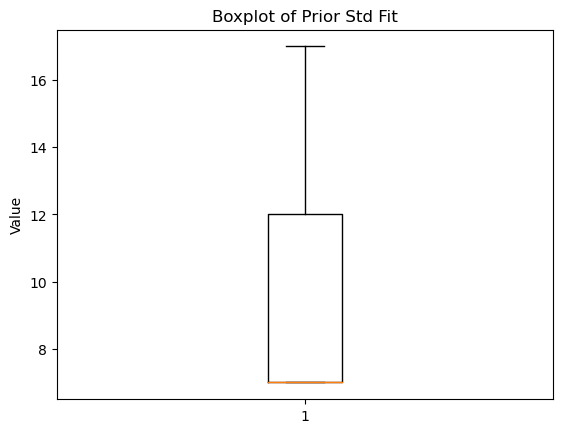

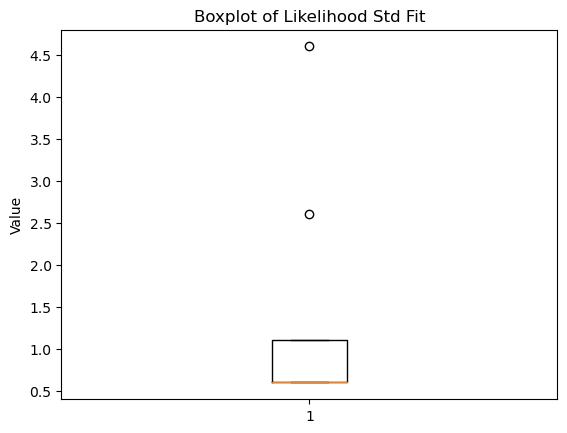

In [375]:
import matplotlib.pyplot as plt

# create boxplot for prior_std_fit
fig1, ax1 = plt.subplots()
ax1.boxplot(prior_std_fit)
ax1.set_title('Boxplot of Prior Std Fit')
ax1.set_ylabel('Value')

# create boxplot for likelihood_std_fit
fig2, ax2 = plt.subplots()
ax2.boxplot(likelihood_std_fit)
ax2.set_title('Boxplot of Likelihood Std Fit')
ax2.set_ylabel('Value')

plt.show()


#### It's not working now (fmin)
#### I tried to use fmin but the targ_loc i pass in was 40 by 1 after pass in it became 3 by 1 werid.

In [ ]:
from scipy.optimize import fmin

options = {'ftol': 1e-8, 'disp': False}
nparams = 3
pmin = np.ones(nparams) * 1
pmax = np.ones(nparams) * 50
nsubjs = 15
niters = 1
allfits = np.empty((niters, nparams))
nll = np.empty((niters, 1))
best_params = np.empty((nsubjs, nparams))
min_nll = np.empty((nsubjs, 1))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    
    print(targ_loc)
    
    init = np.random.uniform(pmin, pmax, nparams)
    # randomly initialize the starting point
    
    #nll=prior_cal_nll(subject_data, init)    
    #print(nll)
    allfits[iter, :], nll[iter] = fmin(prior_cal_nll, init, args=([targ_loc],[true_answer],), maxiter=500, full_output=True, disp=False)
    # returns the best fit parameters and their values
    
    # do all of that niters times, then pick the best ones
    idx = np.argmin(nll)
    min_nll[subj, :] = nll[idx]
    best_params[subj, :] = allfits[idx, :]
    #print(min_nll[subj,:])
    #print(best_params[subj,:])


### 4. Validation of Prior Model (Recover the params from the simulated data)

In [384]:
prior_std_range = np.arange(1, 30, 2)
likelihood_std_range = np.arange(.1,10,.5);

allfits = np.empty((niters, nparams))
nLL_retotal = np.empty((len(prior_std_range),len(likelihood_std_range)))
prior_std_refit = np.empty((nsubjs))
likelihood_std_refit = np.empty((nsubjs))
the_renLL = np.empty((nsubjs))

for subj in range(nsubjs):
    subject_data =  pd.DataFrame(data_ref2[data_ref2['subjID']==subj+1])
        
    targ_loc = np.array(subject_data['oriFinal'])
    true_answer = np.array(subject_data['oriRespFinal'])
    print(subj)
    
    prior_mu = 45
    prior_std = prior_std_fit[subj]

    likelihood_std = likelihood_std_fit[subj]

    simu_answers,posterior = prior_simulate_data(targ_loc,prior_mu,prior_std,likelihood_std)
    simu_answers = np.array(simu_answers)
    
    for prior_idx in range(len(prior_std_range)):
        for likelihood_idx in range(len(likelihood_std_range)):
            # remember to change the 45 into other prior mu based on the data set u r using
            nll=prior_cal_nll(targ_loc,simu_answers,[45, prior_std_range[prior_idx],likelihood_std_range[likelihood_idx]])
            
            nLL_retotal[prior_idx,likelihood_idx] = nll
    
    the_renLL[subj] = np.min(nLL_retotal) # final fitted nll
    I = np.nanargmin(nLL_retotal)

    j_idx = np.ceil(I / len(prior_std_range)).astype(int)-1
    i_idx = I - (j_idx) * len(prior_std_range) - 1

    prior_std_refit[subj] = prior_std_range[i_idx]  # refitted prior std
    likelihood_std_refit[subj] = likelihood_std_range[j_idx] # refitted likelihood std

0


C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:18: RuntimeWarning: invalid value encountered in divide
  post = post/np.sum(post, axis=1, keepdims=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19148\3691053948.py:32: RuntimeWarning: divide by zero encountered in log
  llh = np.sum(np.log(col_probs))


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [385]:
correlation_data = np.corrcoef(true_answer, simu_answers)[0,1]
correlation_likelihood = np.corrcoef(likelihood_std_refit, likelihood_std_fit)[0,1]
correlation_prior = np.corrcoef(prior_std_fit, prior_std_refit)[0,1]

print([correlation_data, correlation_likelihood, correlation_prior])


[0.6879474780552982, 0.08537792937171511, 0.004236147413513745]


In [386]:
likelihood_std_refit

array([0.6, 0.6, 0.6, 1.6, 0.6, 0.6, 0.6, 0.6, 0.6, 0.1, 0.6, 0.1, 0.1,
       8.6, 0.6])

In [387]:
likelihood_std_fit

array([0.6, 0.6, 0.6, 4.6, 0.6, 0.6, 1.1, 1.1, 0.6, 0.6, 0.6, 2.6, 1.1,
       1.1, 0.6])

In [388]:
prior_std_refit

array([ 7.,  3.,  7., 27.,  3.,  7.,  7.,  7.,  7., 29.,  7., 27., 27.,
        7.,  7.])

In [389]:
prior_std_fit

array([ 7.,  7.,  7.,  7.,  7.,  7., 17., 17.,  7.,  7.,  7.,  7., 17.,
       17.,  7.])

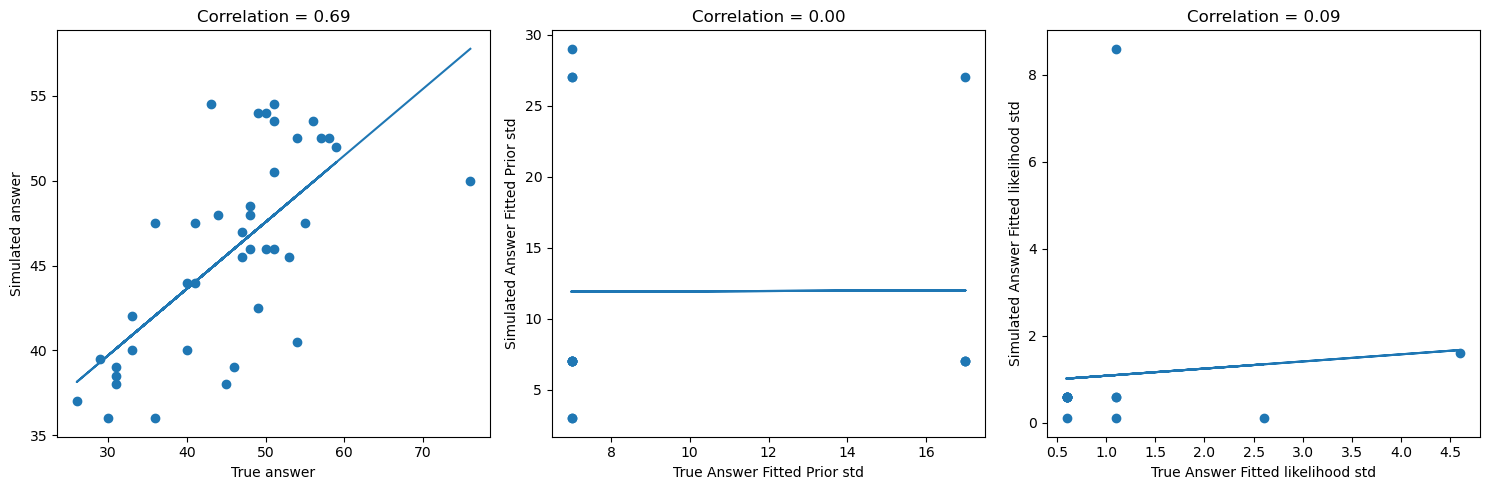

In [390]:
# Plot the real data, simulated data

# Draw scatter plots and lines
fig, axs = plt.subplots(1, 3, figsize=(15,5))

# True answer and prior fit
axs[0].scatter(true_answer, simu_answers)
m, b = np.polyfit(true_answer, simu_answers, 1)
axs[0].plot(true_answer, m*true_answer + b)
axs[0].set_xlabel('True answer')
axs[0].set_ylabel('Simulated answer')
axs[0].set_title('Correlation = {:.2f}'.format(correlation_data))


#Plot the real data fitted params, and simulated data fitted params

# True and simulated data fitted prior
axs[1].scatter(prior_std_fit, prior_std_refit)
m, b = np.polyfit(prior_std_fit, prior_std_refit, 1)
axs[1].plot(prior_std_fit, m*prior_std_fit + b)
axs[1].set_xlabel('True Answer Fitted Prior std')
axs[1].set_ylabel('Simulated Answer Fitted Prior std')
axs[1].set_title('Correlation = {:.2f}'.format(correlation_prior))

# True and simulated data fitted likelihood
axs[2].scatter(likelihood_std_fit, likelihood_std_refit)
m, b = np.polyfit(likelihood_std_fit, likelihood_std_refit, 1)
axs[2].plot(likelihood_std_fit, m*likelihood_std_fit + b)
axs[2].set_xlabel('True Answer Fitted likelihood std')
axs[2].set_ylabel('Simulated Answer Fitted likelihood std')
axs[2].set_title('Correlation = {:.2f}'.format(correlation_likelihood))

plt.tight_layout()
plt.show()

Model validation 不太好，我感觉可能是simulate有问题，simulate的时候算完posterior之后，我是按那个pdf的频率随机再抽一个数，（另一种选择是直接选posterior最大值对应的点，但那个的simulate结果error都特别小..）或者可能是fit的时候gride search每一步比较大，精确性不高，但现有的计算已经很耗时间了...